# Capital Budgeting Decision Jupyter Notebook
### Build the EXCEL model first then code it in PYTHON. Includes: 
+ Future Value (FV), 
+ Present Value (PV), 
+ Paybaack Period (PP), 
+ Net Present Value (NPV), 
+ Equivalent Annual Annuity (EAA)
+ Internal Rate of Return (IRR)
+ Profitability Index (PI)
+ Modifired Internal Rate of Return (MIRR)
+ Crossover Rate and NPV


In [3]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [30]:
def payback_period(period_cashflow):
    '''
    Payback Period
    Parameter:
        period_cashflow: [CF_0, ... , CF_n] 
        discount_rate: Discount Rate (r) can based on CAPM 
    return:
        payback_period
    '''
    if len(period_cashflow) == 0:
        return -1
    df = pd.DataFrame(enumerate(period_cashflow), columns=['Period', 'Cash Flow'])
    df['Cumulative Cash Flows'] = df['Cash Flow'].cumsum()
    df['pct'] = np.abs(df['Cumulative Cash Flows'].shift()/df['Cash Flow'])
    df['Last Period'] = df['Period'].shift()
    df['Payback Period'] = df['Last Period'] + df['pct']
    df_positive = df[df['Cumulative Cash Flows']>=0]
    if df_positive.shape[0] == 0:
        return -1
    min_period = df_positive['Period'].min()
    payback_period = df[df['Period'] == min_period]['Payback Period'].iloc[0]
    return payback_period
cash_flow = [-11000, 7000, 7500, 7000, 7000]
payback_period(cash_flow)

1.5333333333333332

In [31]:
def discounted_payback_period(period_cashflow, discount_rate):
    '''
    Dicounted Payback Period
    Parameter:
        period_cashflow: [CF_0, ... , CF_n] 
        discount_rate: Discount Rate (r) can based on CAPM 
    return:
        discounted_payback_period:
    '''
    if len(period_cashflow) == 0:
        return -1
    df = pd.DataFrame(enumerate(period_cashflow), columns=['Period', 'Cash Flow'])
    df['Present Value'] = df.apply(lambda row:row['Cash Flow'] / np.power((1+discount_rate), row['Period']),axis=1)
    df['Cumulative Dsicounted Cash Flows'] = df['Present Value'].cumsum()
    df['pct'] = np.abs(df['Cumulative Dsicounted Cash Flows'].shift()/df['Present Value'])
    df['Last Period'] = df['Period'].shift()
    df['Discounted Payback Period'] = df['Last Period'] + df['pct']
    df_positive = df[df['Cumulative Dsicounted Cash Flows']>=0]
    if df_positive.shape[0] == 0:
        return -1
    min_period = df_positive['Period'].min()
    discounted_payback_period = df[df['Period'] == min_period]['Discounted Payback Period'].iloc[0]
    return discounted_payback_period
cash_flow = [-11000, 7000, 7500, 7000, 7000]
discounted_payback_period(cash_flow, discount_rate)

-1

In [32]:
def net_present_value(period_cashflow, discount_rate):
    '''
    Net Present Value (NPV)
    Parameter:
        period_cashflow: [CF_0, ... , CF_n] 
        discount_rate: Discount Rate (r) can based on CAPM 
    return:
        df['Present Value'].sum(): NPV = the sum of each cash flow's Present Value
    '''
    if len(period_cashflow) == 0:
        return -1
    df = pd.DataFrame(enumerate(period_cashflow), columns=['Period', 'Cash Flow'])
    df['Present Value'] = df.apply(lambda row:row['Cash Flow'] / np.power((1+discount_rate), row['Period']),axis=1)
    return df['Present Value'].sum()
discount_rate = 0.9
cash_flow = [-11000, 7000, 7500, 7000, 7000]
net_present_value(cash_flow, discount_rate)

-3680.534986686719

In [33]:
def equivalent_annual_annuity(period_cashflow, discount_rate):
    '''
    Equivalent Annual Annuity (EAA)
    Parameter:
        period_cashflow: [CF_0, ... , CF_n] 
        discount_rate: Discount Rate (r) can based on CAPM 
    return:
        NPV/PVIFA: EAA
    '''
    n = len(period_cashflow) - 1
    # For the formular PVIFA, n cannot be 0, if n =0, EAA = NPV/0. 
    if n < 0 or n == 0:
        return -1
    NPV = net_present_value(period_cashflow, discount_rate)
    PVIFA = (1 - (1/np.power((1+discount_rate),n)))/discount_rate
    return NPV/PVIFA
discount_rate = 0.9
cash_flow = [-11000, 7000, 7500, 7000, 7000]
equivalent_annual_annuity(cash_flow, discount_rate)

-3587.7851746577903

In [34]:
def internal_rate_of_return(period_cashflow):
    '''
    Internal Rate of Return (IRR)
    Parameter:
        period_cashflow: [CF_0, ... , CF_n] 
        discount_rate: Discount Rate (r) can based on CAPM 
    return:
        npf.irr(period_cashflow): IRR
    '''
    if len(period_cashflow) == 0:
        return -1
    return npf.irr(period_cashflow)
discount_rate = 0.9
cash_flow = [-11000, 7000, 7500, 7000, 7000]
internal_rate_of_return(cash_flow)

0.5307617359784935

In [35]:
def profitability_index(period_cashflow, discount_rate):
    '''
    Profitability Index (PI)
    Parameter:
        period_cashflow: [CF_0, ... , CF_n]
        discount_rate: Discount Rate (r) can based on CAPM 
    return:
        PI: Profitability Index
    '''
    if len(period_cashflow) == 0:
        return -1
    NPV = net_present_value(period_cashflow, discount_rate)
    if NPV == 0:
        return -1
    cost = period_cashflow[0]*(-1)
    PI = (NPV+cost)/cost
    return PI
discount_rate = 0.9
cash_flow = [-11000, 7000, 7500, 7000, 7000]
profitability_index(cash_flow, discount_rate)

0.6654059103012073

In [10]:
def npv_profile(first_cash_flow, second_cash_flow):
    '''
    NPV Profile: Sensitivity Analytics the NPV value by move Discount Rate from 0% to 100%
    Parameter:
        first_cash_flow: The first project's cash flow. [CF_0, ... , CF_n] 
        second_cash_flow: The second project's cash flow. [CF_0, ... , CF_n]  
    Function call: 
        internal_rate_of_return: IRR calculation function calculate based on Cash flow
    return:
        first_irr: The first project's IRR
        second_irr: The first project's IRR 
        diff_cash_flow_irr: The difference of the two cash flows' IRR
            df_cash_flow: (First project cash flows - relative second project cash flow)
        df_npv: Create a data frame for NPV profile plot. ["Discount Rate","Project A", "Project B"]
    '''
    npv_list = []
    for discount_rate in np.arange(0, 1.01, 0.01):
        first_npv = net_present_value(first_cash_flow, discount_rate)
        second_npv = net_present_value(second_cash_flow, discount_rate)
        npv_list.append([discount_rate, first_npv, second_npv])
    df_npv = pd.DataFrame(npv_list, columns=["Discount Rate","Project A", "Project B"])
    # NPV = 0, for IRR
    first_irr = internal_rate_of_return(first_cash_flow)
    second_irr = internal_rate_of_return(second_cash_flow)
    # before calulate the differ
    df_cash_flow = pd.DataFrame({
        "Project A":pd.Series(first_cash_flow), 
        "Project B":pd.Series(second_cash_flow)
        }).fillna(0)
    df_cash_flow['Diff Cash Flow'] = df_cash_flow["Project A"] - df_cash_flow["Project B"]
    diff_cash_flow = list(df_cash_flow['Diff Cash Flow'])
    # Cross over rate
    diff_cash_flow_irr = internal_rate_of_return(diff_cash_flow)
    return first_irr, second_irr, diff_cash_flow_irr, df_npv
    # first_irr, second_irr, diff_cash_flow_irr, df_npv = npv_profile\
    #     (first_cash_flow = [-11000, 7000, 7500, 7000, 7000],\ 
    #     second_cash_flow = [-1500000, 800000, 800000, 300000, 100000])

In [11]:

if __name__ == '__main__':
    first_cash_flow = [-11000, 7000, 7500, 7000, 7000]
    second_cash_flow = [-150000, 80000, 80000, 30000, 10000, 20000]
    npv_profile(first_cash_flow, second_cash_flow)
    first_irr, second_irr, diff_cash_flow_irr, df_npv = npv_profile(first_cash_flow, second_cash_flow)
    print('--------------------------------------------------------------------')
    print('Project A Cash Flows: ',first_cash_flow)
    print('Project B Cash Flows: ',second_cash_flow)
    print('--------------------------------------------------------------------')
    print('{} IRR ={:0.2%}'.format('Project A',first_irr))
    print('{} IRR ={:0.2%}'.format('Project B',second_irr))
    print('{} ={:0.2%}'.format('Crossover Rate',diff_cash_flow_irr))

--------------------------------------------------------------------
Project A Cash Flows:  [-11000, 7000, 7500, 7000, 7000]
Project B Cash Flows:  [-150000, 80000, 80000, 30000, 10000, 20000]
--------------------------------------------------------------------
Project A IRR =53.08%
Project B IRR =21.03%
Crossover Rate =17.65%


In [15]:
def plot_npv_profile(first_cash_flow, second_cash_flow):
    if second_cash_flow == [0,0]:
        first_irr, second_irr, diff_cash_flow_irr, df_npv = npv_profile(first_cash_flow, second_cash_flow)
        plt.figure(figsize=(9,6))

        plt.axhline(y=0, c='gray', linestyle='dashed')
        plt.axvline(x=diff_cash_flow_irr, c='gray', linestyle='dashed')

        plt.plot(df_npv['Discount Rate'], df_npv['Project A'], label='Project A')
        
        plt.title("NPV Profile (Sensitivity Test for NPV)", fontsize=14)
        plt.xlabel('Discount Rate (r)')
        plt.ylabel('NPV (in dollar)')
        plt.legend()
        plt.show()
    else:
        first_irr, second_irr, diff_cash_flow_irr, df_npv = npv_profile(first_cash_flow, second_cash_flow)
        plt.figure(figsize=(9,6))

        plt.axhline(y=0, c='gray', linestyle='dashed')
        plt.axvline(x=diff_cash_flow_irr, c='gray', linestyle='dashed')

        plt.plot(df_npv['Discount Rate'], df_npv['Project A'], label='Project A')
        plt.plot(df_npv['Discount Rate'], df_npv['Project B'], label='Project B')
        
        plt.title("NPV Profile (Sensitivity Test for NPV)", fontsize=14)
        plt.xlabel('Discount Rate (r)')
        plt.ylabel('NPV (in dollar)')
        plt.legend()
        plt.show()

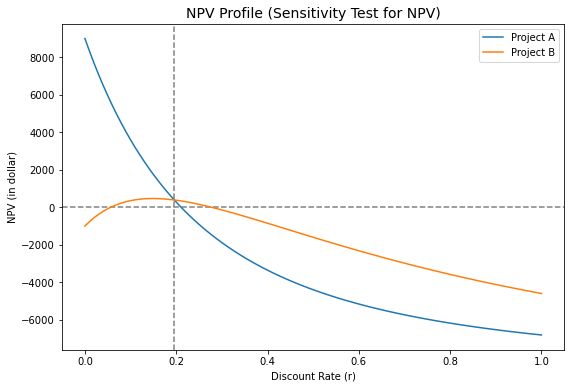

In [26]:
if __name__ == '__main__':
    first_cash_flow = [-9000, 1500, 2500, 3500, 3500, 3500, 3500]
    second_cash_flow = [-11000, 7500, 7500, 7500, 7500, -20000]
    plot_npv_profile(first_cash_flow, second_cash_flow)

-----
| Discount Rate: 0.9
-----
Input first cash flow, separate each cash flow by ",". 
    For example: -1100000, 500000, 300000, 300000, 300000 
Cash flow: -9000, 1500, 2500, 3500, 3500, 3500, 3500
-----
Input second cash flow, separate each cash flow by ",". 
    For example: -150000, 80000, 80000, 30000, 10000, 20000
    (press [Enter] to Skip)
Cash flow: -11000, 7500, 7500, 7500, 7500, -20000
--------------------------------------------------------------------
--------------------------------------------------------------------
First Cash Flows:  [-9000, 1500, 2500, 3500, 3500, 3500, 3500]
Discount Rate:  			 0.9
Payback Period (PP):  			 3.429
Discounted Payback Period (DPP):  	 nan
Net Present Value (NPV):  		 -6523.41
Equivalent Annual Annuity (EAA):  	 -5998.58
Internal Rate of Return (IRR):  	 0.2108
Profitability Index (PI):  		 0.28
--------------------------------------------------------------------
--------------------------------------------------------------------
Seco

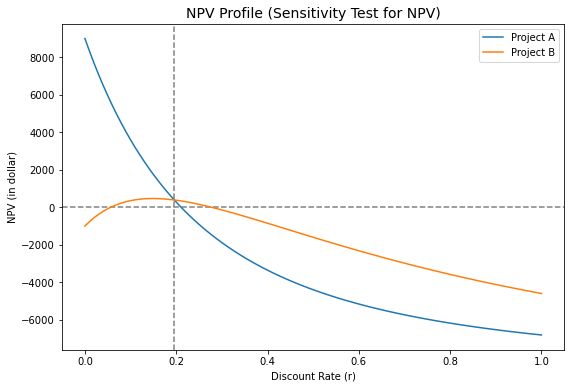

In [29]:
if __name__ == '__main__': 
    print('-----')
    input_discount_rate=input('| Discount Rate: ')
    discount_rate = float(input_discount_rate)
    print('-----')
    print('Input first cash flow, separate each cash flow by ",". ')
    print('    For example: -1100000, 500000, 300000, 300000, 300000 ')
    input_first_cash_flow=input('Cash flow: ')
    input_first_cash_flow_list=input_first_cash_flow.split(",")
    first_cash_flow = [int(input_first_cash_flow_list[i]) for i in range(len(input_first_cash_flow_list))]
    print('-----')
    print('Input second cash flow, separate each cash flow by ",". ')
    print('    For example: -150000, 80000, 80000, 30000, 10000, 20000')
    print('    (press [Enter] to Skip)')
    input_second_cash_flow=input('Cash flow: ')
    if input_second_cash_flow == '':
        input_second_cash_flow = '0,0'
    input_second_cash_flow_list=input_second_cash_flow.split(",")
    second_cash_flow = [int(input_second_cash_flow_list[i]) for i in range(len(input_second_cash_flow_list))]


    print('--------------------------------------------------------------------')
    print('--------------------------------------------------------------------')
    print('First Cash Flows: ',first_cash_flow)
    print('Discount Rate: ','\t\t\t',discount_rate)
    if payback_period(first_cash_flow) == -1:
        print('Payback Period (PP): ','\t\t\t','nan')
    else:
        print('Payback Period (PP): ','\t\t\t',format(payback_period(first_cash_flow), '.3f'))
    if discounted_payback_period(first_cash_flow, discount_rate) == -1:
        print('Discounted Payback Period (DPP): ','\t','nan')
    else:
        print('Discounted Payback Period (DPP): ','\t',format(discounted_payback_period(first_cash_flow, discount_rate), '.3f'))
    print('Net Present Value (NPV): ','\t\t',format(net_present_value(first_cash_flow, discount_rate), '.2f'))
    if equivalent_annual_annuity(first_cash_flow, discount_rate) == -1:
        print('Equivalent Annual Annuity (EAA): ','\t','nan')
    else:
        print('Equivalent Annual Annuity (EAA): ','\t',format(equivalent_annual_annuity(first_cash_flow, discount_rate), '.2f'))
    print('Internal Rate of Return (IRR): ','\t',format(internal_rate_of_return(first_cash_flow), '.4f'))
    print('Profitability Index (PI): ','\t\t',format(profitability_index(first_cash_flow, discount_rate), '.2f'))
    first_irr, second_irr, diff_cash_flow_irr, df_npv = npv_profile(first_cash_flow, second_cash_flow)
    
    if input_second_cash_flow != '0,0':
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('Second Cash Flows: ',second_cash_flow)
        print('Discount Rate: ','\t\t\t',discount_rate)
        if payback_period(second_cash_flow) == -1:
            print('Payback Period (PP): ','\t\t\t','nan')
        else:
            print('Payback Period (PP): ','\t\t\t',format(payback_period(second_cash_flow), '.3f'))
        if discounted_payback_period(second_cash_flow, discount_rate) == -1:
            print('Discounted Payback Period (DPP): ','\t','nan')
        else:
            print('Discounted Payback Period (DPP): ','\t',format(discounted_payback_period(second_cash_flow, discount_rate), '.3f'))
        print('Net Present Value (NPV): ','\t\t',format(net_present_value(second_cash_flow, discount_rate), '.2f'))
        if equivalent_annual_annuity(second_cash_flow, discount_rate) == -1:
            print('Equivalent Annual Annuity (EAA): ','\t','nan')
        else:
            print('Equivalent Annual Annuity (EAA): ','\t',format(equivalent_annual_annuity(second_cash_flow, discount_rate), '.2f'))
        print('Internal Rate of Return (IRR): ','\t',format(internal_rate_of_return(second_cash_flow), '.4f'))
        print('Profitability Index (PI): ','\t\t',format(profitability_index(second_cash_flow, discount_rate), '.2f'))
        print('--------------------------------------------------------------------')
    
    print('Crossover Rate: ','\t\t\t',format(diff_cash_flow_irr, '.4f'))
    print('--------------------------------------------------------------------')
    plot_npv_profile(first_cash_flow, second_cash_flow)